In [4]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import sb_tools
import cmocean
import netCDF4 as nc



# Load SB data

In [ ]:
SB_ADCP = pd.read_('E:/PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/datalogger', header=0, engine='python',names=['time','Lat','Long'])
SB_Iskant = pd.read_csv("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_Iskant_Position.csv", header=0, engine='python',names=['time','Lat','Long'])

In [2]:
# load topo
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [3]:
# Focus topo to interest region


lat_lim = [70, 80]
lon_lim = [5, 45]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

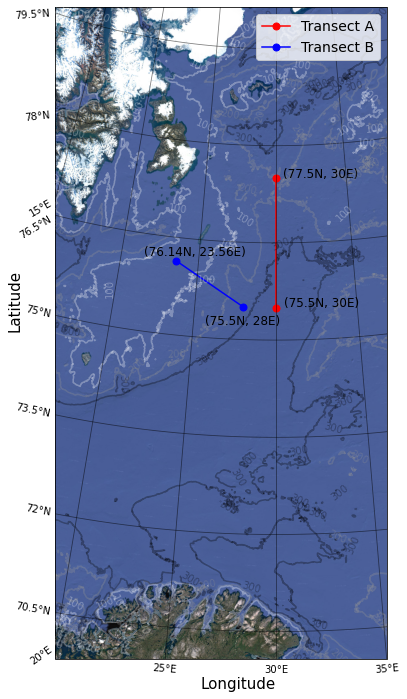

In [50]:
fig   = plt.figure(figsize=(8,12))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[20, 35, 70, 80]
ax.set_extent(extent, crs = ccrs.PlateCarree())


# Add the Stamen aerial imagery at zoom level 7.
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.3, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add transects 2021
plt.plot([PF_2021[1],PF_2021[3]], [PF_2021[0],PF_2021[2]],
        'r.-', markersize=14,transform=ccrs.PlateCarree(), label="Transect A")
plt.text(PF_2021[1]+0.5, PF_2021[0]+0.008,
         '('+str(PF_2021[0]) +'N, '+ str(PF_2021[1])+'E)',
         fontsize=12, transform=ccrs.PlateCarree())
plt.text(PF_2021[3]+0.5, PF_2021[2],
         '('+str(PF_2021[2]) +'N, '+ str(PF_2021[3])+'E)',
         fontsize=12, transform=ccrs.PlateCarree())


plt.plot([NESSAR2008[1],NESSAR2008[3]], [NESSAR2008[0],NESSAR2008[2]],
        'b.-', markersize=14,transform=ccrs.PlateCarree(), label="Transect B")

plt.text(NESSAR2008[1]-2.3, NESSAR2008[0]-0.3,
         '('+str(NESSAR2008[0]) +'N, '+ str(NESSAR2008[1])+'E)',
         fontsize=12, transform=ccrs.PlateCarree())
plt.text(NESSAR2008[3]-2.1, NESSAR2008[2]+0.02,
         '('+str(NESSAR2008[2]) +'N, '+ str(NESSAR2008[3])+'E)',
         fontsize=12, transform=ccrs.PlateCarree())

plt.legend(fontsize=14)

# Add axes labels
ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)
ax.text(0.55, -.05, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)



fig.savefig('PF_SB_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')